In [46]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv("C:/Users/harshit/Downloads/Superstore Marketing Data1.csv")

In [48]:
df.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,########,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,########,0,6,...,11,0,34,2,3,1,2,7,1,0


In [49]:
# Shape of the dataset
df.shape

(2240, 22)

In [50]:
# Column names
df.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [51]:
# Data type of the variables
df.dtypes

Id                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [52]:
# Checking for unique values
df.nunique()

Id                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             401
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
Response                  2
Complain                  2
dtype: int64

In [53]:
# Null values present in all columns
df.isnull().sum()

Id                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

In [54]:
# Checking if any duplicated data is present
df.duplicated().sum()

0

# Data Cleaning

In [55]:
df["Income"].fillna(df["Income"].mean(),inplace=True)

In [56]:
df.isnull().sum()

Id                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Response               0
Complain               0
dtype: int64

In [57]:
df["Dt_Customer"].value_counts()/df.shape[0]

########      0.408929
8/31/2012     0.005357
2/14/2013     0.004911
5/22/2014     0.004464
8/20/2013     0.004464
                ...   
9/21/2013     0.000446
11/14/2012    0.000446
4/14/2013     0.000446
10/19/2012    0.000446
5/25/2013     0.000446
Name: Dt_Customer, Length: 401, dtype: float64

- As we can see that in this date customer column number of ###### values is 40% , and it will not be agood option to impute these values so we will be dropping this column

In [58]:
df.drop(columns=["Dt_Customer"],inplace=True)

# Describing data mean, median, mode, variance and standard deviation

In [59]:
des=df.describe().T

In [60]:
df.describe(include=["O"]).T

,count,unique,top,freq
Education,2240,5,Graduation,1127
Marital_Status,2240,8,Married,864


In [61]:
variance=np.var(df)
sd = np.std(df)
des=pd.concat([des,variance,sd],axis=1)
des.rename(columns={0:"Variance",1:"Standard Deviation"},inplace=True)

C:\Users\harshit\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3745: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\harshit\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3603: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [62]:
des

,count,mean,std,min,25%,50%,75%,max,Variance,Standard Deviation
Id,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0,1.053611e+07,3245.937415
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0,1.435538e+02,11.981394
Income,2240.0,52247.251354,25037.797168,1730.0,35538.75,51741.5,68289.75,666666.0,6.266114e+08,25032.207750
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0,2.897431e-01,0.538278
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0,2.963895e-01,0.544417
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0,8.384492e+02,28.955987
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0,1.132472e+05,336.522251
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0,1.581220e+03,39.764555
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0,5.092469e+04,225.664984
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0,2.982993e+03,54.616784


# Checking distribution of  various columns

## Binomial Distribution

<Axes: xlabel='Complain', ylabel='count'>

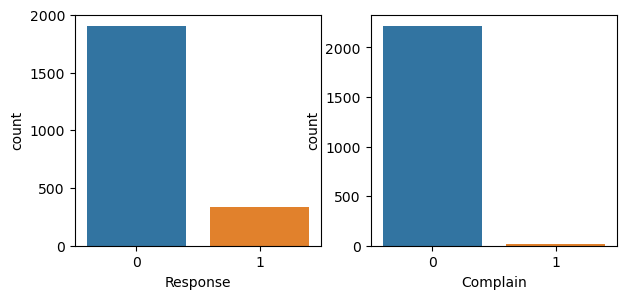

In [63]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
sns.countplot(x=df["Response"])

plt.subplot(1,2,2)
sns.countplot(x=df["Complain"])

In [64]:
df["Response"].value_counts()[1]/df.shape[0]

0.14910714285714285

In [65]:
df["Complain"].value_counts()[1]/df.shape[0]

0.009375

     P(customer accepted the offer in last campaign) = 0.14
     P(customer registering a complain)              = 0.008

## Normal Distribution

In [66]:
numerical_columns=df.select_dtypes(exclude=["O"])
numerical_columns.drop(columns=["Response","Complain"],inplace=True)

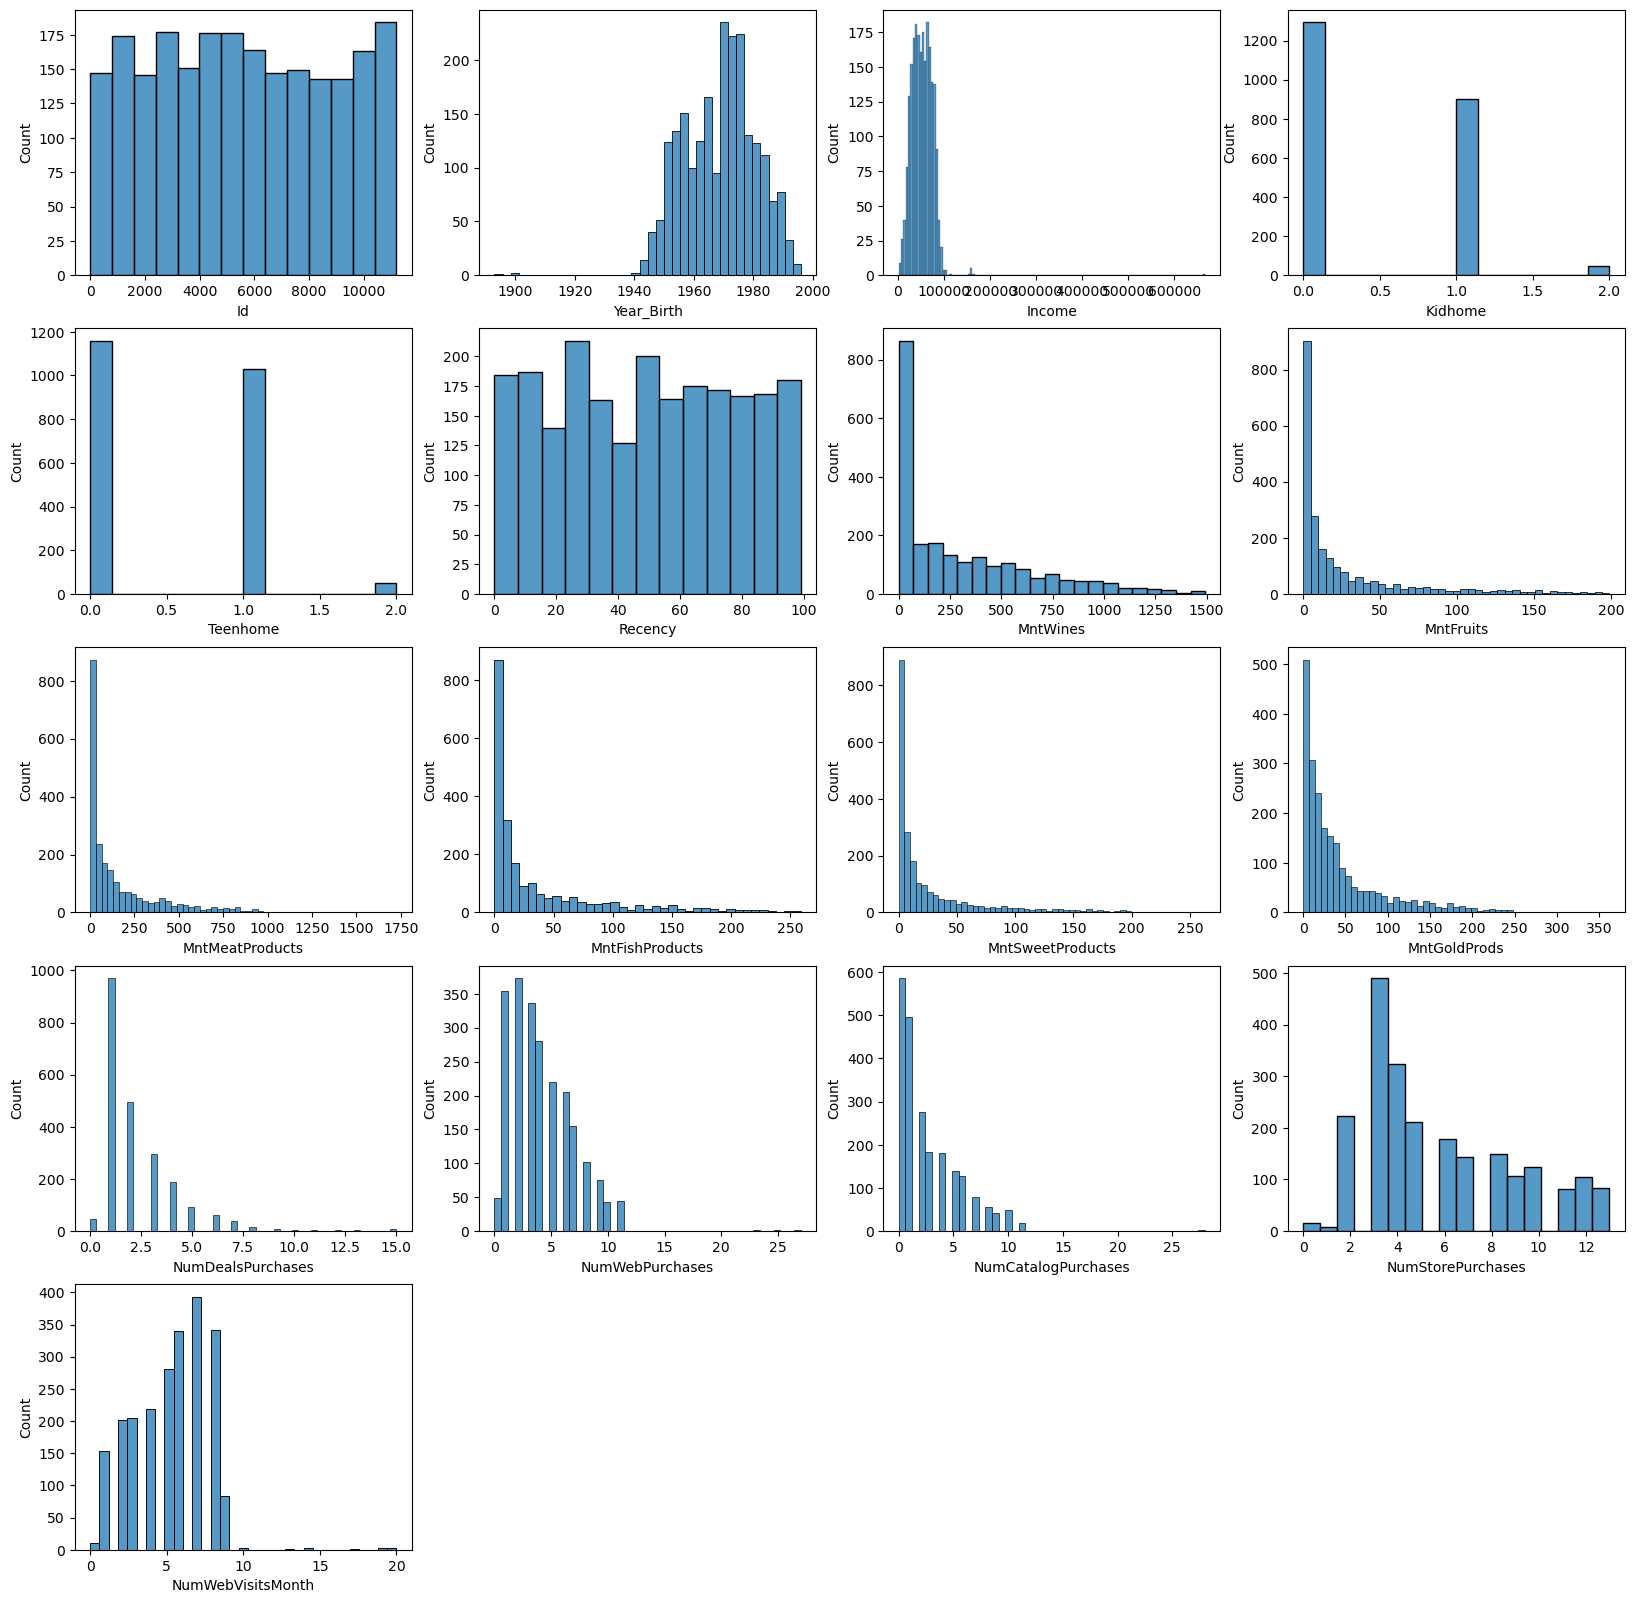

In [67]:
plt.figure(figsize=(20,20))
n=1
for i in numerical_columns.columns:
    plt.subplot(5,4,n)
    sns.histplot(x=df[i])
    n=n+1

    - Year Birth and Income are the columns which are Normally Distributed 
    - Some columns such as 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds'   are the columns in which skewness is found and they are right skewed

# Outliers

- From the above distribution plots we can clearly see that Income feature is distributed normally and also outliers are also present in it so we will remove them in it 

<Axes: xlabel='Year_Birth'>

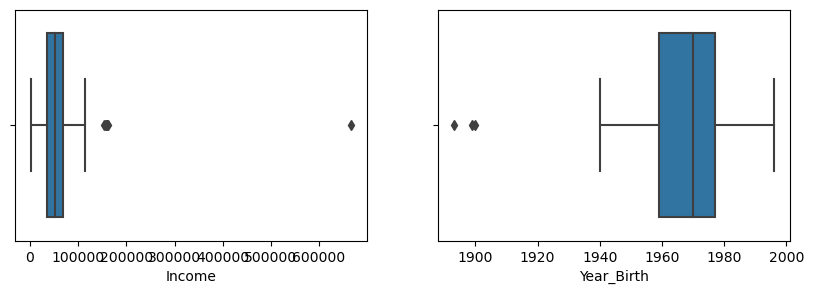

In [68]:
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
sns.boxplot(x=df["Income"])

plt.subplot(1,2,2)
sns.boxplot(x=df["Year_Birth"])


In [69]:
# Calculating Statistics for oputlier removal
def quartile (col):
    q1=col.quantile(0.25)
    q3=col.quantile(0.75)
    iqr= q3-q1

    upperwhisker = q3 + 1.5*iqr
    lowerwhisker = q1 - 1.5*iqr
    return upperwhisker,lowerwhisker

In [70]:
# Removing outlier values in Income column

uw ,lw = quartile(df["Income"])
df=df[(df["Income"]<uw)&(df["Income"]>lw)]

# Removing outlier values in Year_Birth column

uw ,lw = quartile(df["Year_Birth"])
df=df[(df["Year_Birth"]<uw)&(df["Year_Birth"]>lw)]

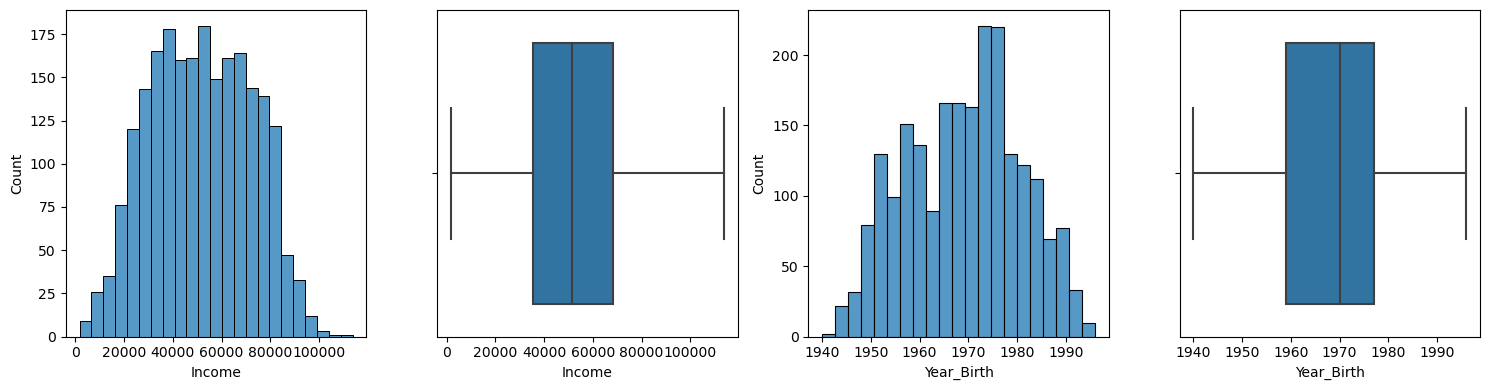

In [71]:
# Rechecking the data 

plt.figure(figsize=(15,4))
plt.subplot(1,4,1)
sns.histplot(x=df["Income"])

plt.subplot(1,4,2)
sns.boxplot(x=df["Income"])

plt.subplot(1,4,3)
sns.histplot(x=df["Year_Birth"])

plt.subplot(1,4,4)
sns.boxplot(x=df["Year_Birth"])

plt.tight_layout()

In [72]:
df.shape

(2229, 21)

- After Removing outliers 11 rows of the dataframe have been deleted and remaining shape of the dataframe is mentioned above

# Exploring relationships between Customers and their spending habits

<Axes: xlabel='Marital_Status'>

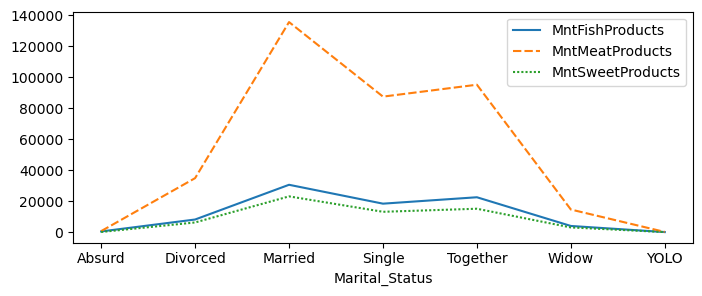

In [73]:
df["Marital_Status"].replace({"Alone":"Single"},inplace=True)
plt.figure(figsize=(8,3))
temp=df.groupby("Marital_Status")[["MntFishProducts","MntMeatProducts","MntSweetProducts",]].sum()
sns.lineplot(data=temp,estimator=np.sum)

    - At an average we can say that married and single people are peoples which are spending most.
    - Rest all the different types of people are approximately spending at the average rates 

<Figure size 800x300 with 0 Axes>

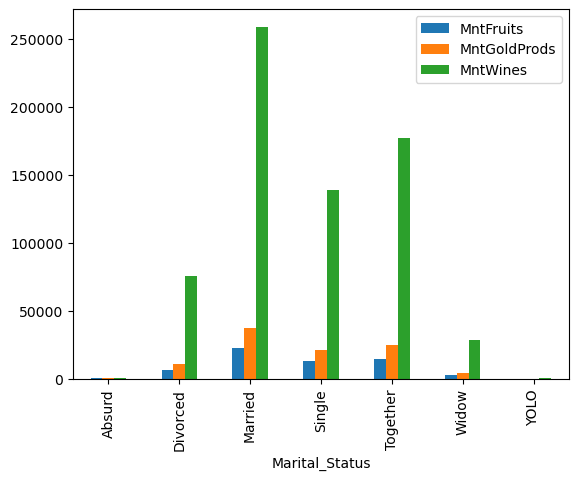

In [74]:
plt.figure(figsize=(8,3))
temp=df.groupby("Marital_Status")[["MntFruits","MntGoldProds","MntWines"]].sum().plot(kind="bar")


    - From this graph we can observe that Wines is the most famous product amomhg the customers 
    - Customers are spending very less on the fruits products there is a high scope of revenue generation in these fruits    products

<Axes: xlabel='Education', ylabel='Income'>

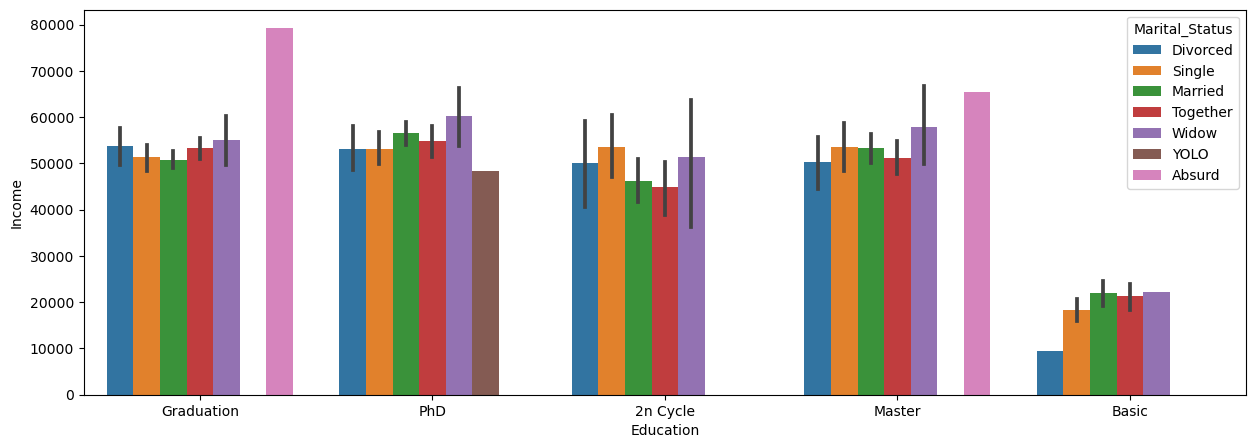

In [75]:
plt.figure(figsize=(15,5))
sns.barplot(data=df,x="Education",y="Income",hue="Marital_Status")

In [76]:
#https://edaonautomobiles-cskay8f5yabyc4iozmzzuh.streamlit.app/


    -Income among the customers are evenly distributed to a very good extent, so we should assume that spend on various     products should be same but that is not the case. In conclusion to this we can say that high salary may not be the case for high spending  on various productrs spending is dependent on other factors.

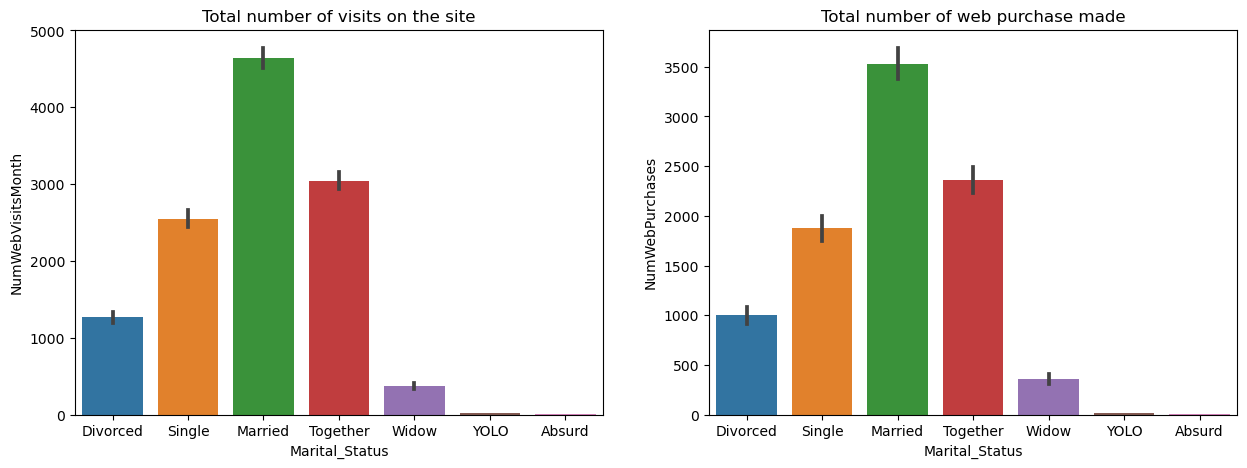

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df["Marital_Status"],y=df["NumWebVisitsMonth"],estimator=np.sum)
plt.title("Total number of visits on the site")

plt.subplot(1,2,2)
sns.barplot(x=df["Marital_Status"],y=df["NumWebPurchases"],estimator=np.sum)
plt.title("Total number of web purchase made")
plt.show()

    -We can see that num of vists per month  and number of web purchases are similarly distributed ,so we can safely say that peoples who are visiting more on the site are buying more from the site . 

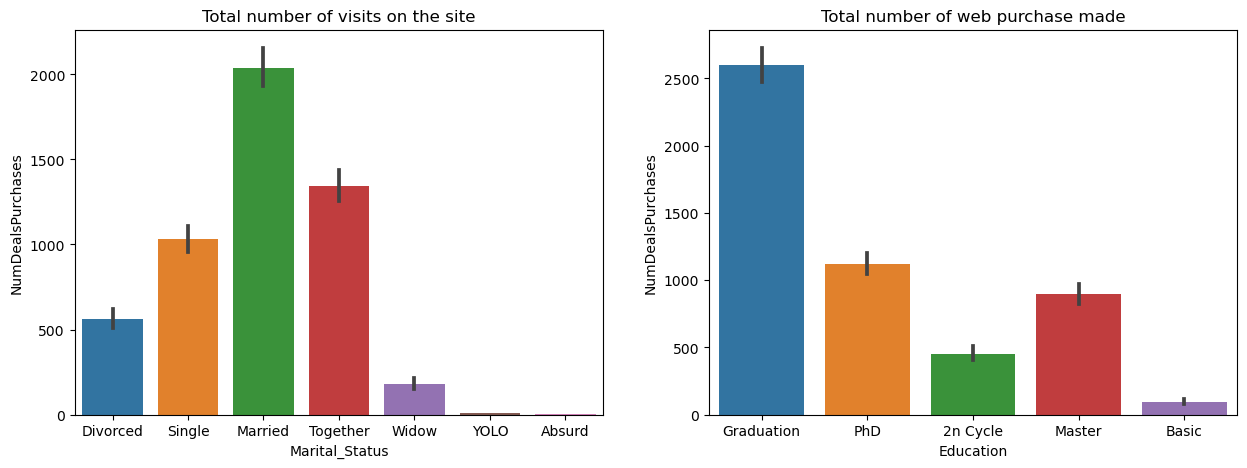

In [78]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(x=df["Marital_Status"],y=df["NumDealsPurchases"],estimator=np.sum)
plt.title("Total number of visits on the site")

plt.subplot(1,2,2)
sns.barplot(x=df["Education"],y=df["NumDealsPurchases"],estimator=np.sum)
plt.title("Total number of web purchase made")
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### Conclusion

- Deals are most famous among the Graduate group which might be because they are looking for jobs and have less money. Married peoples are also investing more in the deals so  try marketing deals to these peoples and to increase the number of people taking deals try to sell deals single peoples too. 

- Peoples are spending more on meat products as compared to fish products this may be because of the quality of the fish products, So we should focus on improving the quality of the fish products and try giving deals on the fish products so as to increase their sales
- People love drinking alcohol and this is also being dipicted in the graphs above, we should try and to introduce other types of hard drinks so as to increase the sales
- Fruits are sold less in numbers so we should give deals with fruits included so as to increase the sales of the fruits